# Lab 4

Introduction to  EEG Analysis. This notebook is for you to get exposure to EEG signal analysis and artifact removal.

## EEG Theory

### Eletroencephalography

The electroencephalogram or EEG is a recording of the biopotentials in the cerebrum of thebrain. These potentials are typical recorded at the surface of the scalp and can vary withrespect to the emotional, mental, and physiological state of a person. The action potentialsand synaptic potentials of an individual neurons are too small to be measured by electrodes.Therefore, an EEG is a measurement of the summation of the electrical signals produce byneurons in a defined area and over a specific amount of time. It is important to note that theseneurons need not synchronized but may be producing signals in an asynchronous manner.EEG signals can be categorizedby the four major frequency ranges or brainwaves in whichthey occur: alpha, beta, delta and theta. The corresponding frequencies, amplitudes, andtypical human functionality of the waves are seen in Table.


| Brainwave | Frequency | Amplitude (uV) | Human Function |
| --------- | --------- | -------------- | -------------- |
| alpha | 8 - 13 | 2 - 100 | Awake, Quiet, Resting, Eyes Open|
| beta | 13 - 22 | 5 - 100 | Mental Activity or External Stimulus|
| delta | 0.4 - 4 | 20 - 100| Sleep |
| theta | 4 - 8 | 10 | Emotional Stress | 


A special system of electrode placement called the 10-20 system is used during EEG recordings.The 10 and 20 refer to percent distances of the electrodes from each other with respect to the sizeof the patient’s head. The letters F, T, C, P, and O in the 10 20 system refer to frontal, temporal,central, parietal, and occipital or essential lobes of the brain excluding central. Also, even numbers are located on the right hemisphere and odd numbers on the left hemisphere. The letterz is an indicator of the central line of the head.



In [1]:
'''You will need to install the following package'''
!pip3 install fooof

## Import the CSV
We first need to read in the csv file name from your data. Please insert the name of your file in the code below:

In [2]:
import pandas as pd
import mne 
import os
import scipy
# Opens up another window with your plot
# %matplotlib qt 
# Read in Data
directory = 'Lab_4_Data'
file = 'recording_2023-04-11-20.27.49.csv'
EEGCsv = pd.read_csv(os.path.join(directory, file))
EEGCsv.index = pd.to_datetime(EEGCsv['timestamps'], unit='s')

# Set channel sampling frequency
fs = 250
seconds = EEGCsv.timestamps- EEGCsv.timestamps.iloc[0]

ch_names = [ 'Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8'] # set EEG channel names
for ch in [ 'Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8']:
    EEGCsv[ch] = EEGCsv[ch]/100000 # rescale data (uv to volts)
    EEGCsv[ch] = mne.filter.filter_data(EEGCsv[ch].values, 250, 0.1, 100) # apply a highpass filter
    EEGCsv[ch] = mne.baseline.rescale(EEGCsv[ch].values, seconds, (0,10)) # apply baseline rescaling    

display(EEGCsv)


Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 8251 samples (33.004 sec)

Applying baseline correction (mode: mean)
Setting up band-pass filter from 0.1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition 

,timestamps,Fz,C3,Cz,C4,Pz,PO7,Oz,PO8,stim
timestamps,,,,,,,,,,
2023-04-11 20:28:02.009274112,1.681245e+09,-0.033920,-0.033920,-0.033943,-0.033947,-0.033939,-0.033966,-0.033939,-0.033954,0.0
2023-04-11 20:28:02.011203328,1.681245e+09,-0.018899,-0.018892,-0.018912,-0.018913,-0.018912,-0.018921,-0.018908,-0.018920,0.0
2023-04-11 20:28:02.013651968,1.681245e+09,-0.010882,-0.010878,-0.010895,-0.010895,-0.010895,-0.010901,-0.010889,-0.010898,0.0
2023-04-11 20:28:02.016745984,1.681245e+09,-0.020576,-0.020574,-0.020590,-0.020593,-0.020590,-0.020604,-0.020585,-0.020598,0.0
2023-04-11 20:28:02.016768768,1.681245e+09,-0.034864,-0.034860,-0.034879,-0.034884,-0.034879,-0.034901,-0.034877,-0.034896,0.0
...,...,...,...,...,...,...,...,...,...,...
2023-04-11 20:30:02.395378432,1.681245e+09,-0.015031,-0.015031,-0.015036,-0.015028,-0.015055,-0.015074,-0.014979,0.080159,0.0
2023-04-11 20:30:02.397849088,1.681245e+09,-0.009964,-0.009962,-0.009962,-0.009946,-0.009987,-0.010002,-0.009888,0.111132,0.0
2023-04-11 20:30:02.397864704,1.681245e+09,-0.024762,-0.024755,-0.024769,-0.024762,-0.024781,-0.024803,-0.024742,0.020620,0.0


## EEG Signals
The above code prints out a table containing your collected data. One thing to note is the column names and what they correspond to. We have time, electrode position values, and Stim (0 or 1). For now, lets focus on the electrode positions.

The data was collected using the standard 10-20 placement. The code below shows you these positions.


4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


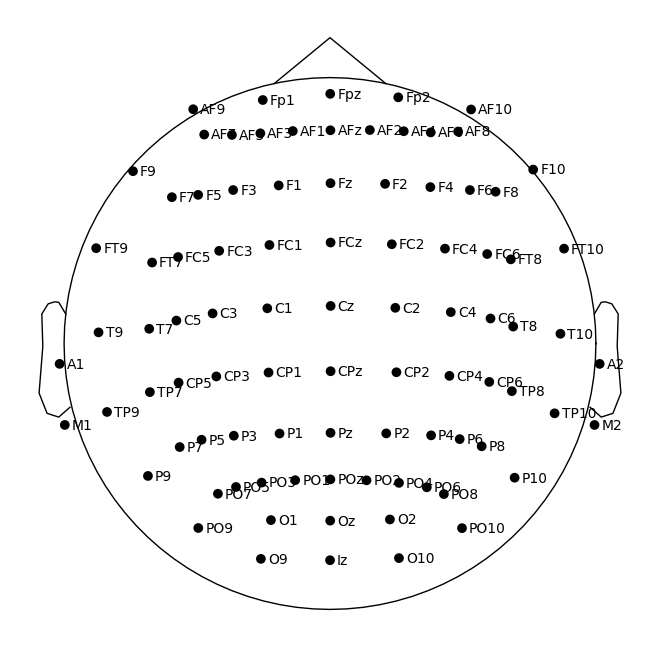

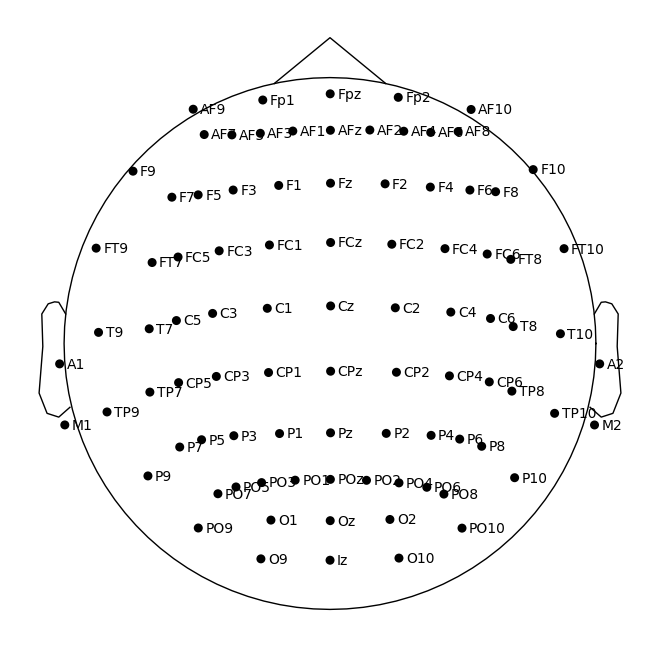

In [4]:
mon = mne.channels.make_standard_montage('standard_1020')
mon.plot(kind='topomap', show_names=True)# 2d Plot

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.
Creating RawArray with float64 data, n_channels=90, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


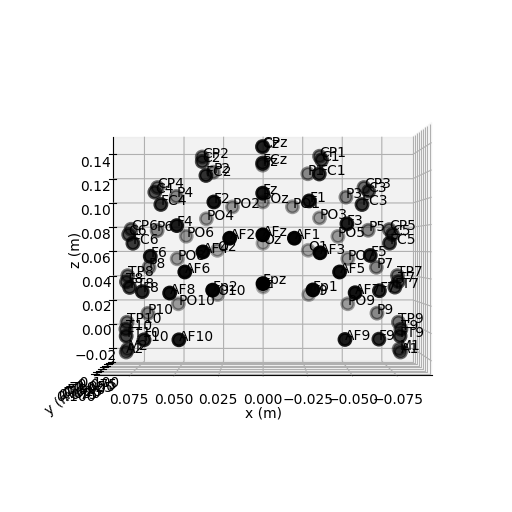

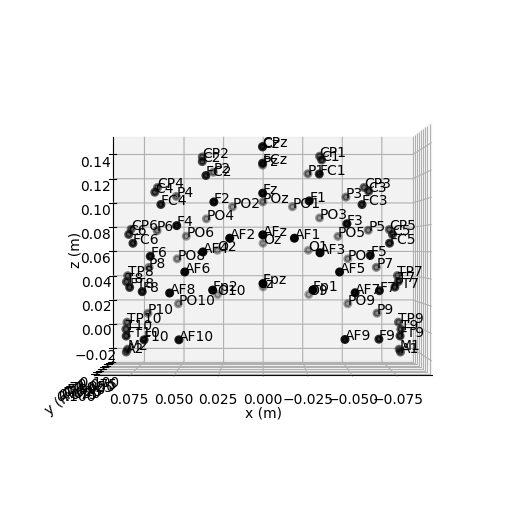

In [5]:
# The window that this opens is interactable, so you can rotate around to get a better idea where each electrode is.
mon.plot(kind='3d', show_names=True)# 3d Plot

We now need to plot signals from our dataset. Unfortunately, some of the electrode positions are incorrectly named and need to be renamed. Our analysis uses the MNE toolbox. Feel free to look at the MNE documentation online.

# Plot the raw data


Creating RawArray with float64 data, n_channels=8, n_times=30179
    Range : 0 ... 30178 =      0.000 ...   120.712 secs
Ready.
Using matplotlib as 2D backend.


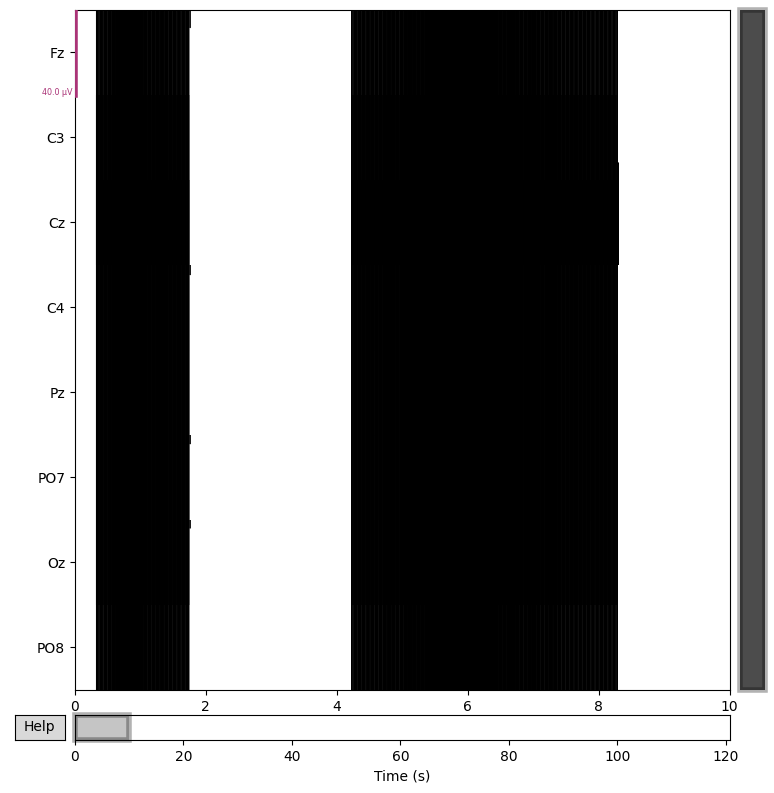

'You can scale the graphs using +/-'

In [6]:
# Create MNE Info to apply to csv data
info = mne.create_info(ch_names, fs, ch_types='eeg')

df_mne = EEGCsv[ch_names]

# Create the Raw Object for MNE
raw = mne.io.RawArray(df_mne.values.transpose(), info)


# Plot the data
raw.plot(n_channels=8)

'''You can scale the graphs using +/-'''

## Plot the PSD

Effective window size : 8.192 (s)


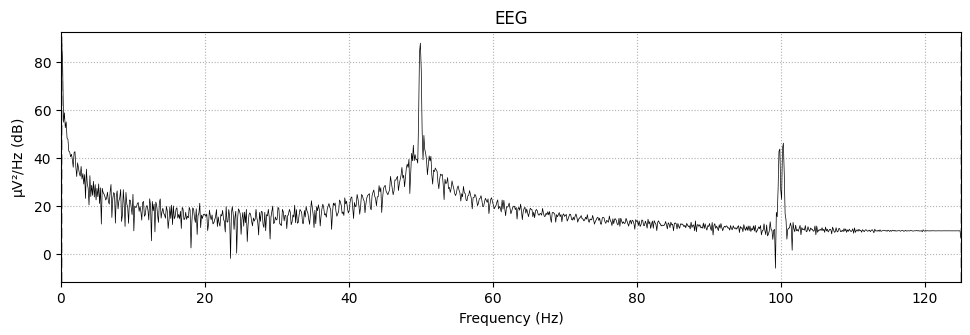

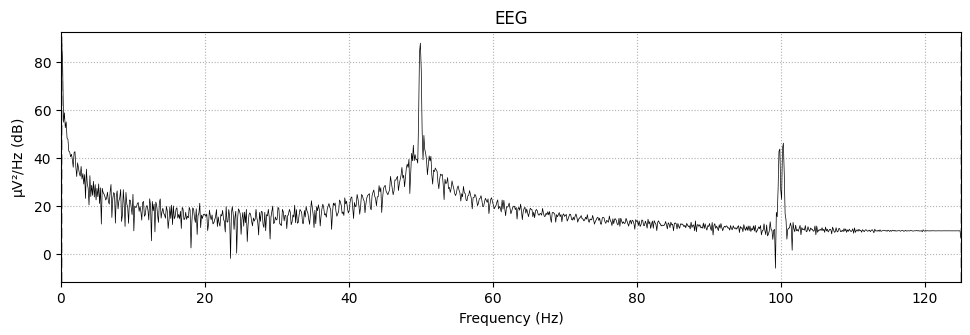

In [7]:
raw.plot_psd(area_mode='range', tmax=10.0, show=False, average=True)

## Notch Filter

You should see a spike in the PSD ~60. The code below will apply a notch filter at 60 Hz.

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 sec)

Effective window size : 8.192 (s)


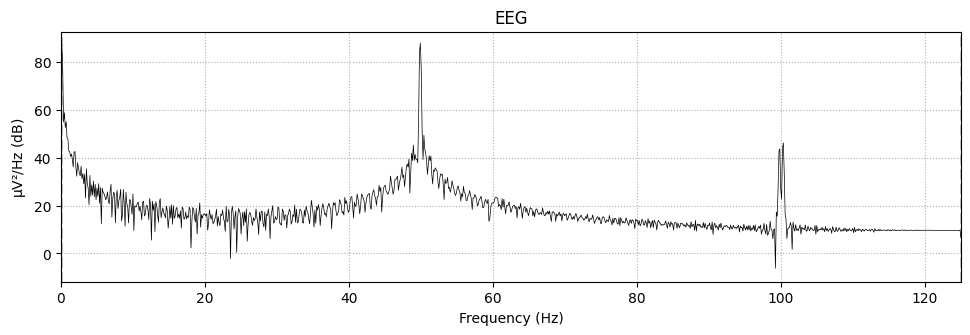

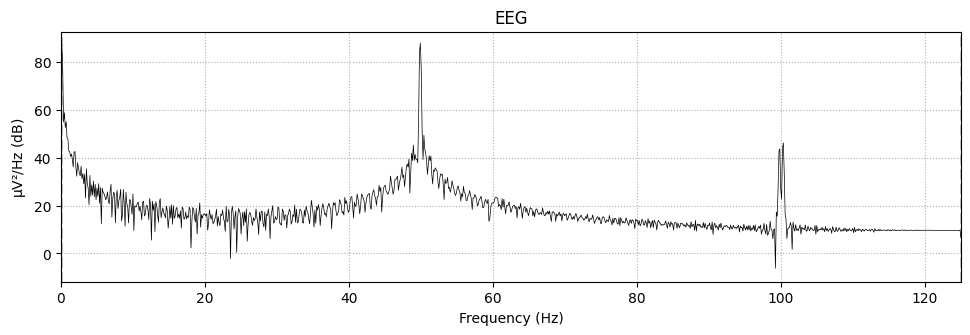

In [8]:
import scipy
import scipy.fftpack
import matplotlib.pyplot as plt
import numpy as np
# Run the following to create a notch filter at 60 hz and view the resulting PSD
raw.notch_filter(np.arange(60, 128, 60))
raw.plot_psd(area_mode='range', tmax=10.0, show=False, average=True)

In [9]:
def check_nans(data, nan_policy='zero'):
    """Check an array for nan values, and replace, based on policy."""

    # Find where there are nan values in the data
    nan_inds = np.where(np.isnan(data))

    # Apply desired nan policy to data
    if nan_policy == 'zero':
        data[nan_inds] = 0
    elif nan_policy == 'mean':
        data[nan_inds] = np.nanmean(data)
    else:
        raise ValueError('Nan policy not understood.')

    return data

Effective window size : 1.000 (s)


c:\Users\saif_\anaconda3\envs\eeg\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):
c:\Users\saif_\anaconda3\envs\eeg\lib\site-packages\mne\utils\check.py:92: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LooseVersion(library.__version__) < LooseVersion(min_version):


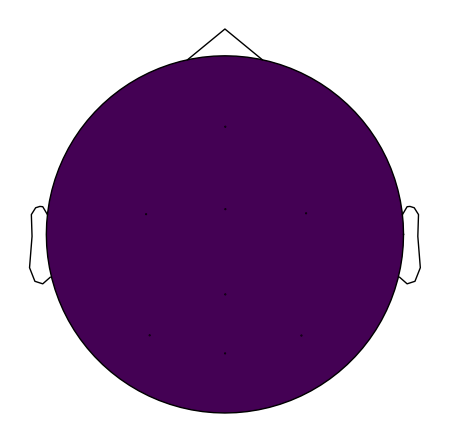

(<matplotlib.image.AxesImage at 0x25d079b8348>, None)

In [10]:
from mne.viz import plot_topomap
from mne.time_frequency import psd_welch
# from mne.time_frequency import psd_array_welch

# FOOOF imports
from fooof import FOOOFGroup
from fooof.bands import Bands
from fooof.analysis import get_band_peak_fg
from fooof.plts.spectra import plot_spectrum

from matplotlib import cm, colors, colorbar

'''Set the 10-20 montage for our data'''
raw.set_montage(mon)

'''Apply the PSD Welch algorithm to get the Power Spectral Density'''
spectra, freqs = psd_welch(raw, fmin=1, fmax=40, tmin=0, tmax=250,
                           n_overlap=150, n_fft=250)

# spectra, freqs = psd_array_welch(raw, fmin=1, fmax=40, 
#                            n_overlap=150, n_fft=250, sfreq=250)

# Initialize a FOOOFGroup object, with desired settings
fg = FOOOFGroup(peak_width_limits=[1, 6], min_peak_height=0.15,
                peak_threshold=2., max_n_peaks=6, verbose=False)

# Define the frequency range to fit
freq_range = [1, 30]

# Fit the power spectrum model across all channels
fg.fit(freqs, spectra, freq_range)

# Define frequency bands of interest
bands = Bands({'theta': [3, 7],
               'alpha': [7, 14],
               'beta': [15, 30]})

# Extract alpha peaks
alphas = get_band_peak_fg(fg, bands.alpha)

# Extract the power values from the detected peaks
alpha_pw = alphas[:, 1]

# We need to remove nans for the plot to show
alpha_pw = check_nans(alpha_pw) 

# Plot the topography of alpha power
plot_topomap(alpha_pw, raw.info, cmap=cm.viridis, contours=0)


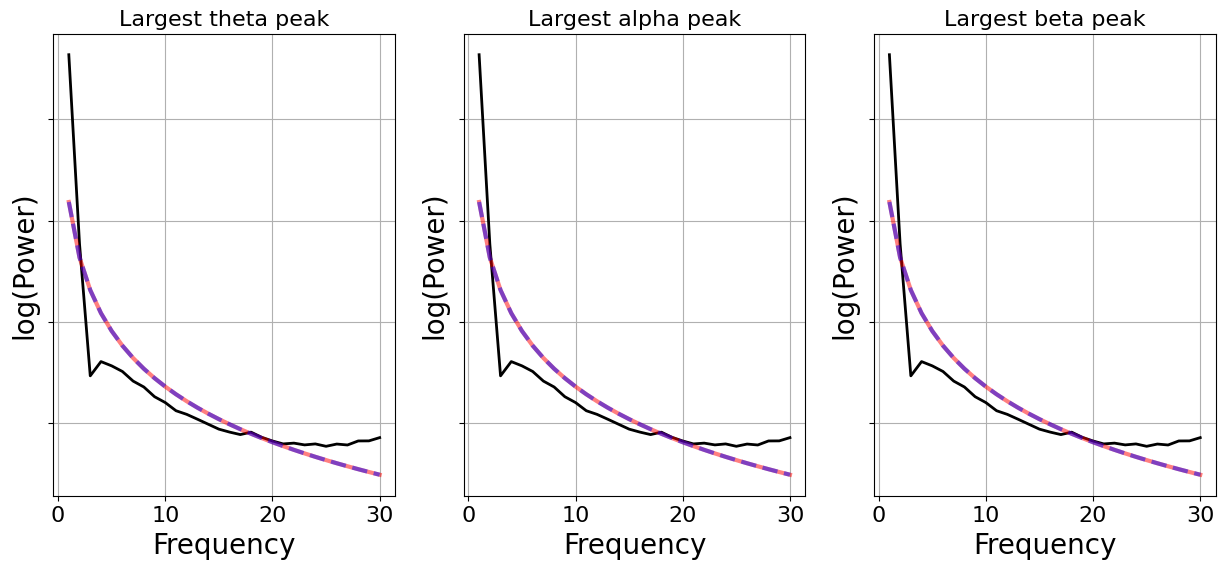

In [11]:
# Define frequency bands of interest
bands = Bands({'theta': [3, 7],
               'alpha': [7, 14],
               'beta': [15, 30]})

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
for ind, (label, band_def) in enumerate(bands):

    # Get the power values across channels for the current band
    band_power = check_nans(get_band_peak_fg(fg, band_def)[:, 1])

    # Extracted and plot the power spectrum model with the most band power
    fg.get_fooof(np.argmax(band_power)).plot(ax=axes[ind], add_legend=False)

    # Set some plot aesthetics & plot title
    axes[ind].yaxis.set_ticklabels([])
    axes[ind].set_title('Largest ' + label + ' peak', {'fontsize' : 16})

## Event Related Potentials

Now that we have an idea of how to extract some meaningful information from EEG signals, we need to do some analysis specifically with our dataset. 

Cats and dogs flashed on the screen. The participant is looking for a specific stimulus, hence the 'stim' column. These stimuli produce what is called a P300 Event Related Potential. We are going to analyze these potentials between the target and non target stimuli.


In [12]:
# We are going to go back to the original dataset and use the Pandas Groupby method to figure out when the target events occur
EEGCsv.groupby('stim').get_group(1)

,timestamps,Fz,C3,Cz,C4,Pz,PO7,Oz,PO8,stim
timestamps,,,,,,,,,,
2023-04-11 20:28:04.041751552,1.681245e+09,0.002759,0.002765,0.002789,0.002786,0.002777,0.002783,0.002777,0.002778,1.0
2023-04-11 20:28:09.069318912,1.681245e+09,0.002728,0.002727,0.002691,0.002703,0.002712,0.002703,0.002706,0.002715,1.0
2023-04-11 20:28:10.606169344,1.681245e+09,-0.002922,-0.002930,-0.002974,-0.002959,-0.002950,-0.002968,-0.002952,-0.002950,1.0
2023-04-11 20:28:11.326282496,1.681245e+09,-0.019926,-0.019932,-0.019971,-0.019966,-0.019953,-0.019970,-0.019958,-0.019959,1.0
2023-04-11 20:28:12.241960704,1.681245e+09,-0.006853,-0.006853,-0.006898,-0.006884,-0.006878,-0.006905,-0.006880,-0.006872,1.0
...,...,...,...,...,...,...,...,...,...,...
2023-04-11 20:29:52.202219520,1.681245e+09,-0.033996,-0.033995,-0.034022,-0.034022,-0.034016,-0.034037,-0.034010,-0.025972,1.0
2023-04-11 20:29:53.802179072,1.681245e+09,-0.025906,-0.025906,-0.025925,-0.025935,-0.025924,-0.025948,-0.025883,0.024652,1.0
2023-04-11 20:29:56.374806016,1.681245e+09,-0.019932,-0.019936,-0.019949,-0.019948,-0.019956,-0.019982,-0.019892,0.063174,1.0


In [13]:
import datetime as dt
# We can now compare an ERP between a target and non-target event.
# We need to slice our dataframe to get the P300 timeframe from these events.
# P300 events occur when a positive deflection occurs approx 300 msec after a triggering event (stimulus)
# Lets see if we can find this peak visually

# We first find a target time by using the .iloc method
TargetTime = EEGCsv.groupby('stim').get_group(1).index[0]

# Then we can index the TimeFrame for the P300
StartTime = TargetTime - dt.timedelta(200*0.001) # Starting at -200 msec
EndTime   = TargetTime + dt.timedelta(500*0.001) # Ending at 500 msec

ERPdf = EEGCsv[(EEGCsv.index > StartTime) & (EEGCsv.index < EndTime)]

# Lets look at what the raw data looks like for 1 ERP
display(ERPdf)

# This code will be useful for the lab questions when computing the PSD of the ERPs. The next code sections are better for plotting

,timestamps,Fz,C3,Cz,C4,Pz,PO7,Oz,PO8,stim
timestamps,,,,,,,,,,
2023-04-11 20:28:02.009274112,1.681245e+09,-0.033920,-0.033920,-0.033943,-0.033947,-0.033939,-0.033966,-0.033939,-0.033954,0.0
2023-04-11 20:28:02.011203328,1.681245e+09,-0.018899,-0.018892,-0.018912,-0.018913,-0.018912,-0.018921,-0.018908,-0.018920,0.0
2023-04-11 20:28:02.013651968,1.681245e+09,-0.010882,-0.010878,-0.010895,-0.010895,-0.010895,-0.010901,-0.010889,-0.010898,0.0
2023-04-11 20:28:02.016745984,1.681245e+09,-0.020576,-0.020574,-0.020590,-0.020593,-0.020590,-0.020604,-0.020585,-0.020598,0.0
2023-04-11 20:28:02.016768768,1.681245e+09,-0.034864,-0.034860,-0.034879,-0.034884,-0.034879,-0.034901,-0.034877,-0.034896,0.0
...,...,...,...,...,...,...,...,...,...,...
2023-04-11 20:30:02.395378432,1.681245e+09,-0.015031,-0.015031,-0.015036,-0.015028,-0.015055,-0.015074,-0.014979,0.080159,0.0
2023-04-11 20:30:02.397849088,1.681245e+09,-0.009964,-0.009962,-0.009962,-0.009946,-0.009987,-0.010002,-0.009888,0.111132,0.0
2023-04-11 20:30:02.397864704,1.681245e+09,-0.024762,-0.024755,-0.024769,-0.024762,-0.024781,-0.024803,-0.024742,0.020620,0.0


### MNE Library and ERPs
We first need to drop columns from our raw data that are not EEG based. Then we can scale and create a raw MNE array for easy plotting.

The next step creates Event Info from our Event column in the original array. We can then use MNE functionality to plot the ERPs between target and non-target events.

Creating RawArray with float64 data, n_channels=8, n_times=30179
    Range : 0 ... 30178 =      0.000 ...   120.712 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=30179
    Range : 0 ... 30178 =      0.000 ...   120.712 secs
Ready.
149 events found
Event IDs: [1 2]


array([[   90,     0,     2],
       [  292,     0,     2],
       [  516,     0,     1],
       [  700,     0,     2],
       [  900,     0,     2],
       [ 1130,     0,     2],
       [ 1350,     0,     2],
       [ 1544,     0,     2],
       [ 1775,     0,     1],
       [ 1970,     0,     2],
       [ 2161,     0,     1],
       [ 2318,     0,     1],
       [ 2547,     0,     1],
       [ 2769,     0,     1],
       [ 2961,     0,     1],
       [ 3176,     0,     1],
       [ 3378,     0,     2],
       [ 3599,     0,     1],
       [ 3772,     0,     2],
       [ 3954,     0,     1],
       [ 4169,     0,     1],
       [ 4355,     0,     1],
       [ 4539,     0,     2],
       [ 4728,     0,     2],
       [ 4906,     0,     2],
       [ 5129,     0,     1],
       [ 5355,     0,     2],
       [ 5527,     0,     1],
       [ 5765,     0,     2],
       [ 5957,     0,     2],
       [ 6166,     0,     2],
       [ 6397,     0,     2],
       [ 6605,     0,     2],
       [ 6

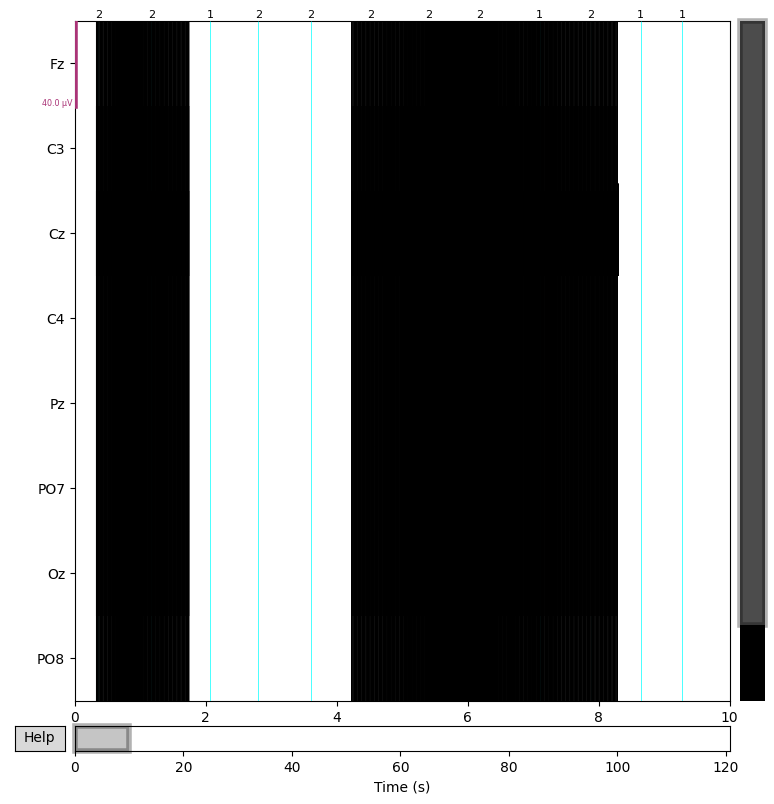

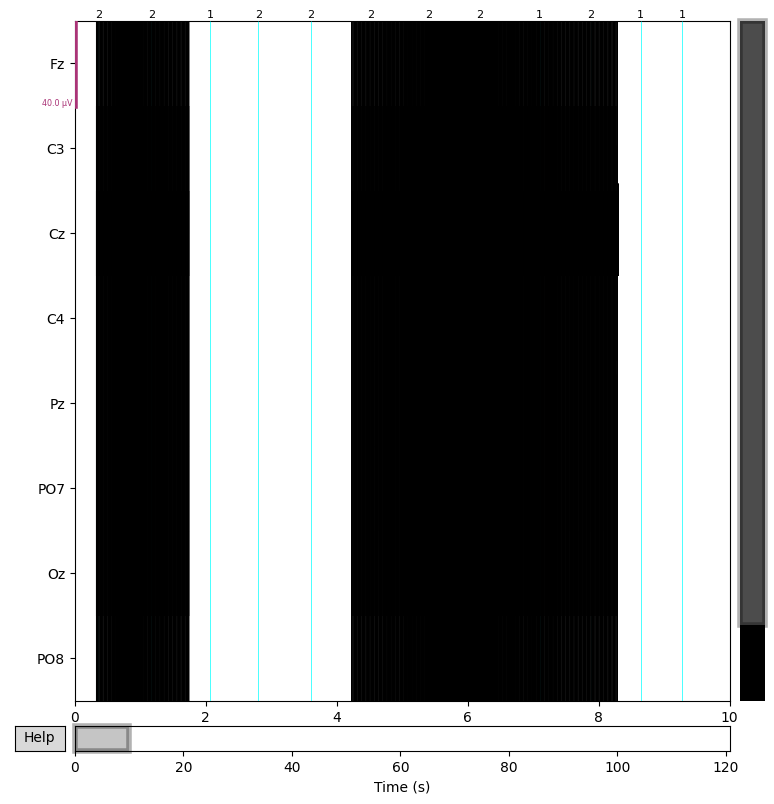

In [14]:
# Create MNE Info to apply to csv data
info = mne.create_info(ch_names, fs, ch_types='eeg')
info['chs'][-1]['kind']



# Create Raw Array
raw = mne.io.RawArray(df_mne.transpose(), info)


# Create Event info and add to raw array
info = mne.create_info(['STI 0'], raw.info['sfreq'], ['stim'])
temp = EEGCsv['stim'].values
temp = np.reshape(temp, (1, -1))
stim_raw = mne.io.RawArray(temp, info)
raw.add_channels([stim_raw], force_update_info=True)

# Get events object for easy access
events = mne.find_events(raw, stim_channel='STI 0', verbose=True)

display(events)

# Plot the data
raw.plot(events = events, n_channels=8)

# Note the vertical lines indicating events

Not setting metadata
Not setting metadata
77 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


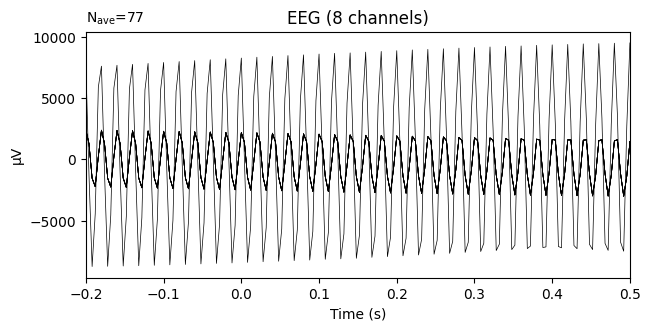

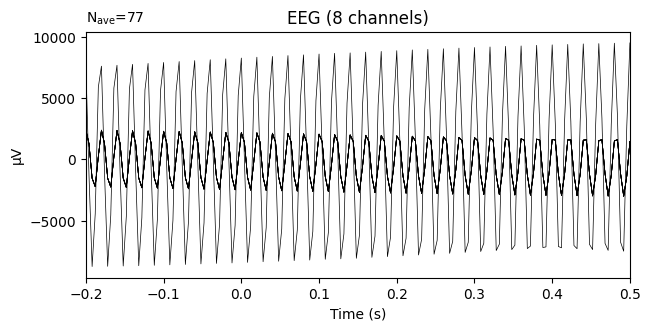

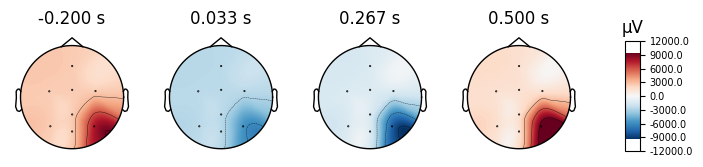

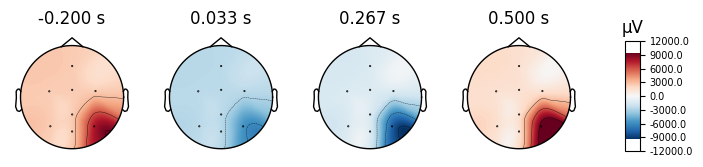

In [18]:
# Set epoch length to -0.2 seconds before stimulus and 0.5 after stimulus
tmin, tmax = -0.2, 0.5

# Set the epoch parameters based on the events in the raw data
epochs_params = dict(events=events, event_id=1, tmin=tmin, tmax=tmax)

# Now we parse our data based on the target events and take the average of all channels
epochs = mne.Epochs(raw, **epochs_params).average()
# Set montage to 10-20
epochs.set_montage(mon)
# Plot EEG data and a topomap
display(epochs.plot())
epochs.plot_topomap()

## We can do this for our dog pictures as well

Not setting metadata
Not setting metadata
72 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


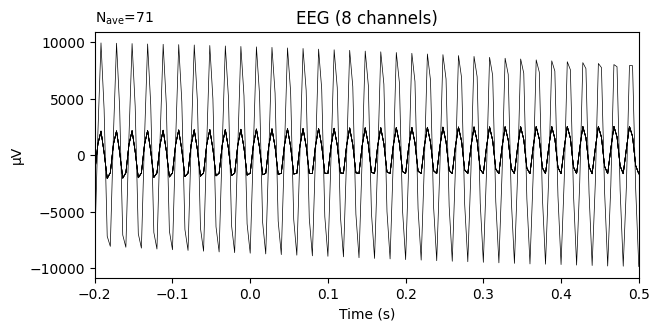

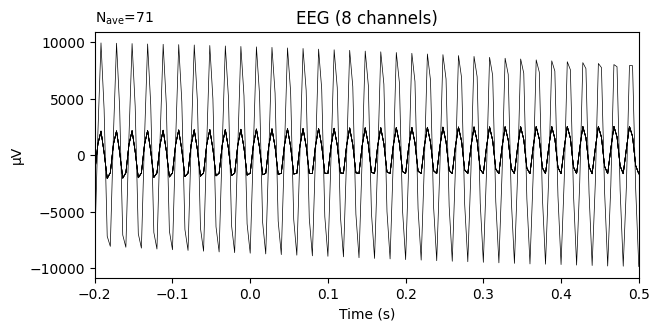

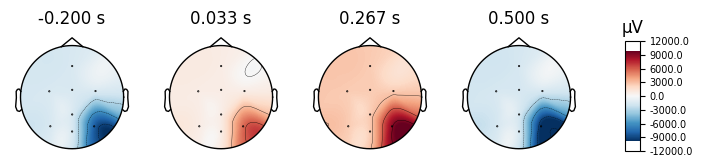

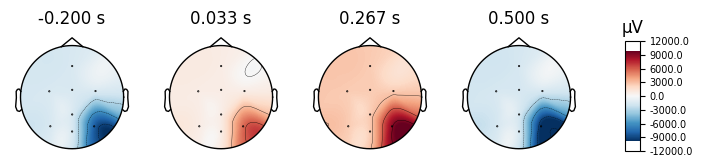

In [19]:
# Set epoch length to -0.2 seconds before stimulus and 0.5 after stimulus
tmin, tmax = -0.2, 0.5


# Set the epoch parameters based on the events in the raw data
epochs_params = dict(events=events, event_id=2, tmin=tmin, tmax=tmax)

# Now we parse our data based on the target events and take the average of all channels
epochs = mne.Epochs(raw, **epochs_params).average()
# Set montage to 10-20
epochs.set_montage(mon)
# Plot EEG data and a topomap
display(epochs.plot())
epochs.plot_topomap()

We now have two plots for target and non-target events. Note the difference between the two graphs.